In [2]:
!pip install translate

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Importing Libraries

In [4]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from translate import Translator
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, linear_model
from sklearn.svm import SVC

In [5]:
# Reading the datset
df = pd.read_excel('mixedDS.XLSX')


# Data Cleaning

In [6]:
import codecs
from nltk.tokenize import word_tokenize
import string


def clean(data):
    stopwords = codecs.open("stopwords.txt", "r", encoding='utf-8', errors='ignore').read().split('\n')
    stopword = []
    for line in stopwords:
        data1 = line.replace('\r', "")
        stopword.append(data1)

    lexicon = []

# tokenization
    all_words = word_tokenize(data)

# Data Cleaning
    exclude = set(string.punctuation)
    for i in all_words:
        st = ''.join(ch for ch in i if ch not in exclude)
        if (st != ''):
            lexicon.append(st)
# Removing Stop words
    lexicons = []
    for word in lexicon:
        if not word in stopword:
            lexicons.append(word)
    lexi = ' '.join([str(elem) for elem in lexicons])
    return lexi

In [7]:
# Complex suffixes
complex_suffixes = {


#PAST TENSE simple past tense 1st person singular
1 : ["ಳಿದ್ದೆ","ಳಲಿಲ್ಲ","ಳಿದ್ದೆನ","ಳಿದೆನ"], #---> append ಳು

#simple past tense 1st person plural
2 : ["ದಿದೆವು","ದಲಿಲ್ಲ","ದಿದೆವ"],# ---> append ದು

#simple past tense 2nd person
3 : ["ಯಲಿಲ್ಲ"],

#simple past tense 3rd person plural
4 : ["ಯಾಗಿದ್ದರು","ವಾಗಿದ್ದರು","ತಾಗಿದ್ದರು","ದಾಗಿದ್ದರು","ದಿದ್ದರು","ಲಿಲ್ಲ","ದ್ದರಾ"],

#simple past tense 3rd person singular
5 : ["ಯಲಿಲ್ಲ","ಲಿಲ್ಲ","ದನ","ದನಾ"],


#past perfect tense 1st person singular
6 : ["ದಿದ್ದೆ","ಡಿದ್ದೆ","ರಲಿಲ್ಲ","ದ್ದೆನ","ದ್ದೆನಾ"],

#past perfect tennse 1st person plural
7 : ["ದಿದ್ವಿ","ರಲಿಲ್ಲ","ದಿದ್ವಾ"],

#past perfect, 2nd
8 : ["ದಿದ್ದೆ","ಯುತ್ತಿದ್ದೆ","ತ್ತಿದ್ದವರು","ತ್ತಿದ್ದೆ","ತಿದ್ದೆ","ಯುತ್ತದೆ","ತ್ತದೆ","ಯುತ್ತಿರಲಿಲ್ಲ","ತ್ತಿರಲಿಲ್ಲ","ತಿರಲಿಲ್ಲ","ದಿರಲಿಲ್ಲ","ದ್ದಿದ್ದಾ","ಯುತ್ತಿದ್ದಾ","ತ್ತಿದ್ದಾ"],

#past perfect 3rd plural
9 : ["ದಿದ್ದರು"],

#past perfect 3rd singular
10 : ["ದಿದ್ದ","ದಿದ್ದನು","ದಿದ್ದಳು"],

#PAST CONTINUOUS simple tense 1st singular
11 : ["ತ್ತಿದ್ದೆನೆ"],

#past continuous 1st plural
12 : ["ಯುತ್ತಿದ್ದೆವು","ತ್ತಿದ್ದೆವು","ಯುತ್ತಿದ್ದೆವ","ತ್ತಿದ್ದೆವ"],

#past continuous 2nd
13 : ["ತ್ತಿದ್ದೆ","ತಿರಲಿಲ್ಲ","ತ್ತಿದ್ದ","ತ್ತಿದ್ದಾ"],

#past continuous 3rd plural
14 : ["ತ್ತಿದ್ದರು","ತ್ತಿರಲಿಲ್ಲ","ತ್ತಿದ್ದರ","ತ್ತಿದ್ದಾರಾ"],

#past continuous 3rd singular
15 : ["ಯುತ್ತಿದ್ದನ","ಯುತ್ತಿದ್ದನಾ","ಯುತ್ತಿದ್ದಳು","ಯುತ್ತಿದ್ದನು","ಯುತ್ತಿದ್ದಳ","ಯುತ್ತಿದ್ದನ","ಯುತ್ತಿದ್ದಳೆ","ಯುತ್ತಿದ್ದನೆ","ತ್ತಿದ್ದನ","ತ್ತಿದ್ದನಾ","ತ್ತಿದ್ದಳು","ತ್ತಿದ್ದನು","ತ್ತಿದ್ದಳ","ತ್ತಿದ್ದನ","ತ್ತಿದ್ದಳೆ","ತ್ತಿದ್ದನೆ"],

#PAST PERFECT continuous 1st singular
16 : ["ತ್ತಿದ್ದೆ","ತ್ತಿರಲಿಲ್ಲ","ತ್ತಿದ್ದೆನ","ತ್ತಿದ್ದೆನಾ"],

#past perfect continuous 1st plural
17 : ["ಯುತ್ತಿದ್ದೆವೆ","ತ್ತಿದ್ದೆವೆ","ಯುತ್ತಿದ್ದೆವು","ತ್ತಿದ್ದೆವು"],

#past p continous 2nd
18 : ["ತ್ತಿದ್ದೆ","ತ್ತಿದ್ದೆವು","ತ್ತಿರಲಿಲ್ಲ","ತ್ತಿದ್ದಾ"], #----- not needed

#past p continuous 3rd plural
19 : ["ತ್ತಿದ್ದರು","ತ್ತಿದ್ದರು"],# -------- not needed

#past p continuous 3rd singular
20 : ["ತ್ತಿಲ್ಲ","ತ್ತಿದ್ದಳ","ತ್ತಿದ್ದಳು","ತ್ತಿದ್ದನ","ತ್ತಿದ್ದನು","ತ್ತಿದ್ದಾರೆ"],

#PRESENT TENSE
#simple 1st singular
21 : ["ರುತ್ತೆನೆ","ತ್ತೆನೆ","ದಿಲ್ಲ","ಯಲ್ವಾ"],

#simple 1st plural
22 : ["ರುತ್ತೆವೆ","ರುತ್ತೇವೆ","ರುವುದಿಲ್ಲ","ರುತ್ತೇವ","ರುತ್ತೆವ","ತ್ತೆವೆ","ತ್ತೇವೆ","ವುದಿಲ್ಲ","ತ್ತೇವ","ತ್ತೆವ"],

#simple 2nd
23 : ["ತ್ತೀಯ","ವುದಿಲ್ಲ","ತ್ತಿಯ"],

#simple 3rd plural
24 : ["ತ್ತಾರೆ","ತ್ತಾರ"],

#simple 3rd singular
25 : ["ತ್ತಾನೆ","ತ್ತಾಳೆ","ವುದಿಲ್ಲ"],

#Present perfect 1st singular
26 : ["ದ್ದಿನಿ","ದ್ದೆನೆ","ದಿಲ್ಲ","ತ್ತಿದ್ದೆ","ಲ್ಲವ","ದೆನ"],

#present perfect 1st plural
27 : ["ದ್ದೆವೆ","ದ್ದೆವ"],

#present perfect 2nd
28 : ["ಡಿದ್ದೀಯ"],

#present perfect 3rd plural
29 : ["ತ್ತಿದ್ದಾರ","ತ್ತಿದ್ದಾರೆ"],

#present perfect 3rd singular
30 : ["ಯಾಗಿದೆ","ಯಾಗಿಲ್ಲ"],

#present continuous 1st singluar
31 : ["ತ್ತಿದ್ದೆನೆ","ತ್ತೆನೆ","ತ್ತೇನೆ","ತ್ತಿದ್ದೇನೆ","ತ್ತಿಲ್ಲ","ತ್ತಿದ್ದೆನ"],

#present cntinouus 1st plural
32 : ["ತ್ತಿದ್ದೇವೆ","ತ್ತೇವೆ","ತ್ತಿಲ್ಲ","ತ್ತಿದ್ದೇವೆ","ತ್ತಿದ್ದೇವ"],

#present continous 2nd
33 : ["ಯುತ್ತಿದ್ದೀಯ","ಯುತ್ತೀಯ","ಯುತ್ತಿರುವೆ","ಯುತ್ತಿಲ್ಲ","ಯುವುದಿಲ್ಲ","ತ್ತಿದಿಯ"],

#present ocntinuous 3rd plural
34 : ["ತಿದರೆ","ತ್ತಿದ್ದಾರೆ","ತ್ತಿಲ್ಲ","ತ್ತಿದ್ದಾರ","ತಿರುವರ"],

#present continuous 3rd singular
35 : ["ತ್ತಿದ್ದಾನೆ","ತ್ತಿದ್ದಾಳೆ","ತ್ತಾನೆ","ತ್ತಾಳೆ","ತ್ತಿದ್ದಾನ","ತ್ತಿದ್ದಾಳ","ತ್ತಿಲ್ಲ"],

#PRESENT PERFECT continuous tense 1st singular
36 : ["ತ್ತಿದ್ದೀನಿ","ತ್ತಿರುವೆ","ತ್ತಿಲ್ಲ","ತ್ತಿದ್ದೀನಿ","ತ್ತಿಲ್ಲವೆ","ತ್ತಿದ್ದೇನೆ"],

#present perfect continuous tense 1st plural
37 : ["ತ್ತಿದ್ದೇವೆ","ತ್ತಿರುವ","ತ್ತಿರುವೆವು","ತ್ತಿರುವೆವ","ತ್ತಿದ್ದೇವ","ತ್ತಿದೇವ","ತ್ತಿಲ್ಲವ","ತ್ತಿಲ್ಲವಾ"],

#present perfect continuous 2nd
38 : ["ತ್ತಿದೀಯ","ತ್ತಿಲ್ಲ","ತ್ತಿರುವೆಯ","ತ್ತಿದ್ದೆಯ","ತ್ತಿಲ್ಲವ"],

#present perfect continuous 3rd plural
39 : ["ದಲ್ಲಿದೆ","ಯಲ್ಲಿದೆ","ರಲ್ಲಿದೆ"],

#present perfect continuous 3rd singular
40 : ["ತ್ತಿದ್ದಾನೆ","ತ್ತಿದ್ದಾಳೆ","ತ್ತಿದ್ದಾಳ","ತ್ತಿದ್ದಾನೆ"],

41 : ["ಯಾದರೆ","ಗಾದರೆ","ವುದಾದರೆ","ದಾದರೆ"],

42 : ["ಯಾಗಿಯೇ","ಗಾಗಿಯೇ","ದಾಗಿಯೇ","ವಾಗಿಯೇ"],

43 : ["ವಾದರು","ಗಾದರು","ತಾದರು","ದಾದರು","ಯಾದರು","ರಾದರು","ಲಾದರು","ಳಾದರು","ವಾದರೂ","ಗಾದರೂ","ತಾದರೂ","ದಾದರೂ","ಯಾದರೂ","ರಾದರೂ","ಲಾದರರೂ","ಳಾದರೂ"],

44 : ["ತ್ತಿದ್ದರಂತೆ","ದೊಂದಿಗೆ","ಯೊಂದಿಗೆ","ರೊಂದಿಗೆ"],

45 : ["ಗಿದ್ದನು","ಗಿದ್ದಳು","ಗಿದ್ದರು","ಗಿದ್ದರೂ","ತಾದ್ದನು","ತಾದ್ದಳು","ತಾದ್ದರು","ತಾದ್ದರೂ","ದಾದ್ದನು","ದಾದ್ದಳು","ದಾದ್ದರು","ದಾದ್ದರೂ"],

46 : ["ಯೊಂದೆ","ವೊಂದೆ","ರೊಂದೆ","ವೊಂದ","ಯೊಂದ","ರೊಂದ","ವುದೇ"],

47 : ["ಯುವವರ","ರುವವರ","ಸುವವರ"],

48 : ["ದಲ್ಲೇ","ನಲ್ಲೇ","ನಲ್ಲಿ","ವಲ್ಲಿ","ದಲ್ಲಿ","ದಲ್ಲೂ","ಯಲ್ಲಿ","ರಲ್ಲಿ","ಗಳಲ್ಲಿ","ಳಲ್ಲಿ","ಯಲ್ಲಿನ"],

49 : ["ವವರು","ಯವರು","ನವರು","ರವರು","ದವರು","ವವ","ಯವ","ನವ","ರವ","ದವ"],

50 : ["ಗಾಗಿ","ದಾಗಿ","ವಾಗಿ","ರಾಗಿ","ಯಾಗಿ","ತಾಗಿ","ಕ್ಕಾಗಿ","ವಾಗಿದ್ದು","ವಾಗಿದ್ದ","ಗಾಗಿದ್ದು","ಗಾಗಿದ್ದ","ರಾಗಿದ್ದು","ರಾಗಿದ್ದ","ದಾಗಿದ್ದು","ದಾಗಿದ್ದ","ತಾಗಿದ್ದು","ತಾಗಿದ್ದ"],

51 : ["ರನ್ನ","ನನ್ನ","ಯನ್ನ"],

52 : ["ರನ್ನು","ವನ್ನು","ಯನ್ನು","ಗಳನ್ನೇ","ಗಳನ್ನು","ಳನ್ನು","ದನ್ನು"] ,

53 : ["ವಿರುವ","ರುವ","ದ್ದರೆ","ದ್ದಾರೆ"],

54 : ["ತ್ತಾರಂತೆ","ತ್ತಾಳಂತೆ","ತ್ತಾನಂತೆ","ಗಂತೆ","ದ್ದಂತೆ","ದಂತೆ","ನಂತೆ","ರಂತೆ","ಯಂತೆ","ಗಳಂತೆ","ಳಂತೆ","ವಂತೆ"],

55 : ["ಗಳೆಂದು","ಗಂ","ದ್ದಂ","ದಂ","ಯಂ","ರಂ","ವಂ","ಗಿಂದ","ದಿಂದ","ಯಿಂದ","ರಿಂದ","ನಿಂದ"],

56 : ["ನಿಗೆ","ರಿಗೆ","ಯಿಗೆ","ಕೆಗೆ"],

57: ["ದ್ದೇನೆ","ದ್ದಾನೆ","ದ್ದಾಳೆ","ದ್ದಾರೆ","ದಾಗ"],

58 : ["ವಿದೆ" ,"ದಿದೆ","ತಿದೆ","ಗಿದೆ"],

59 : ["ತ್ತಿರು","ವೆಂದು"],

60 : ["ನನ್ನೂ","ಳನ್ನೂ","ರನ್ನೂ"],

61 : ["ಯಾಯಿತು", "ಗಾಯಿತು","ದಾಯಿತು"],

62 : ["ದ್ದನು","ದ್ದಳು","ಯಿದ್ದರು","ದ್ದರು","ದ್ದರೂ","ಗಳೇ","ಗಳು","ಗಳ","ಗಳಿ","ದಳು","ದಳ","ವೆನು","ವನು","ವೆವು","ವಳು","ವಳ","ವುದು","ಲಾಗು","ಗಳಾದ","ಗಳಿಗೆ"],

63 : ["ವುದಕ್ಕೆ","ಕ್ಕೆ","ಗ್ಗಿ","ದ್ದಿ","ಲ್ಲಿ","ನ್ನು","ತ್ತು"],

64 : ["ವಾಯಿತು","ಗಾಯಿತು","ದಾಯಿತು","ತಾಯಿತು","ಲಾಯಿತು","ನಾಯಿತು"],

65 : ["ವಿದ್ದು","ವೆಂದಾಗ"],

66 : ["ವನ್ನೇ","ವೇಕೆ"],

67 : ["ರಾದ","ವಾದ","ಗಾದ","ಯಾದ","ರಾಗುವ"],

68 : ["ವಾದುದು", "ರಾದುದು","ಗಾದುದು","ಯಾದುದು","ದಾದುದು"],

69 : ["ಯಾರು","ದಾರು","ಗಾರು","ರಾರು"],

70 : ["ಗಳಿಸಿ","ಗಳಿಸು","ಗಳಿವೆ","ಗಳಿವ","ಗಳಿವು"],

71 :  ["ಯು","ದ","ವಿಕೆ","ದೇ","ರು","ಳ","ಳೆ","ಲಿದೆ","ದೆ","ರೆ","ಗೆ","ವೆ","ತೆ","ಗೂ"],

72 :  ["ರದ","ಮದ","ನದ"],

73 :  ["ಡಲು","ಲಾಗುತ್ತದೆ","ಸಲು","ಸಿದ್ದಾಳೆ","ಸಿದಾಗ","ಸಲು","ಸಿದರು","ಸಿದನು","ಸಿದಳು","ಸಿದ್ದೇ","ಕಿದೀನಿ"]

}


add_1 = ["ು"]


In [8]:
# Stemming
def kannada_root(word, inde):
    global flag

    # checking for suffixes which needs to be retained
    for L in complex_suffixes[72]:
        if len(word) > len(L) + 1:
            if word.endswith(L):
                inde.append(72)

                return (word[:-(len(L) - 1)], inde)

    # checking for suffixes which needs to retained and modified
    for L in complex_suffixes[73]:
        if len(word) > len(L) + 1:
            if word.endswith(L):
                flag = 1
                word = word[:-(len(L) - 1)]
                word = word + add_1[0]
                inde.append(73)
                return (kannada_root(word, inde))

                # checking for suffixes which must be removed
    L = 1
    while L <= 70:
        for suffix in complex_suffixes[L]:
            if len(word) > len(suffix) + 1:
                if word.endswith(suffix):
                    flag = 1
                    inde.append(L)

                    return (kannada_root(word[:-(len(suffix))], inde))
        L = L + 1

    # at last checking for remaining suffixes
    if flag == 0:
        for L in complex_suffixes[71]:
            if len(word) - len(L) > len(L) + 1:
                if word.endswith(L):
                    inde.append(71)
                    return (word[:-(len(L))], inde)

    return word, inde


flag = 0
x = []
def get_vectors(sentences, model):
    vectors = []
    for sentence in sentences:
        sentence_vector = []
        for word in sentence:
            try:
                vector = model.wv[word]
                sentence_vector.append(vector)
            except KeyError:
                # ignore words not in vocabulary
                pass
        # average the word vectors in a sentence to get a sentence vector
        if sentence_vector:
            sentence_vector = np.mean(sentence_vector, axis=0)
        else:
            sentence_vector = np.zeros(model.vector_size)
        vectors.append(sentence_vector)
    return np.array(vectors)

def translate_english_to_kannada(sentence):
    translator = Translator(to_lang="kn")
    translation = translator.translate(sentence)
    return translation

def stemming(data):
    x = data.split()
    num_lines2 = len(x)

    y = []
    for j in range(num_lines2):
        flag = 0
        inde = []
        root = x[j]
        root, inde = kannada_root(x[j], inde)
        y.append(root)

    stemmed = ' '.join([str(elem) for elem in y])

    return stemmed
df['Sentences'] = df['Sentences'].apply(lambda x: clean(x))
df['Sentences'] = df['Sentences'].apply(lambda x: stemming(x))

In [9]:
# Feature Extraction
tfidf = TfidfVectorizer()
X = df['Sentences']
y = df['sentiment']

X = tfidf.fit_transform(X)
print(X)
print(X.shape)

  (0, 516)	0.29025960938591916
  (0, 379)	0.2932227958862754
  (0, 812)	0.30120753968816044
  (0, 378)	0.3644192191829544
  (0, 862)	0.38530148237224165
  (0, 514)	0.35860907997693164
  (0, 373)	0.34662627282858
  (0, 5)	0.38804097689503625
  (0, 647)	0.2417832180529177
  (1, 608)	0.4065300453024091
  (1, 14)	0.23705653353183764
  (1, 582)	0.4508233741940037
  (1, 860)	0.4508233741940037
  (1, 697)	0.44782244340634764
  (1, 290)	0.4141366343593925
  (2, 390)	0.22939324070163325
  (2, 301)	0.5102806678739057
  (2, 572)	0.3408509266974724
  (2, 702)	0.3010531713416785
  (2, 494)	0.2867910556499209
  (2, 48)	0.3468097455172768
  (2, 730)	0.30444703798146533
  (2, 736)	0.3795628981968445
  (2, 14)	0.20223232456589402
  (3, 130)	0.5285072534290048
  :	:
  (1997, 899)	0.207305891590055
  (1997, 534)	0.4319486255610508
  (1998, 31)	1.0
  (1999, 410)	0.3680876963897061
  (1999, 31)	0.4268659753933962
  (1999, 370)	0.47379968339648465
  (1999, 266)	0.43821763059909563
  (1999, 58)	0.51553472731

# Training the dataset

In [10]:
#Splitting the Data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1403, 951)
(602, 951)
(1403,)
(602,)


In [11]:
#Training of ML Models
clf0 = OneVsRestClassifier(svm.SVC(kernel='rbf',gamma=0.5))
clf1 = LinearSVC()
clf2 = LogisticRegression()
clf3 = SGDClassifier()
clf4 = SVC()
clf5 = KNeighborsClassifier(n_neighbors=175)
clf6 = MultinomialNB()
clf7 = RandomForestClassifier()


In [12]:
clf0.fit(X_train, y_train)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)
clf7.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
#Testing of ML Models
y_pred0 = clf0.predict(X_test)
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)
y_pred5 = clf5.predict(X_test)
y_pred6 = clf6.predict(X_test)
y_pred7 = clf7.predict(X_test)

In [14]:
#Classification Report
print("\t\t\tOneVsRestClassifier\n\n", classification_report(y_test, y_pred0))
print("\t\t\tLinear SVC\n\n", classification_report(y_test, y_pred1))
print("\t\t\tLogisticRegression\n\n", classification_report(y_test, y_pred2))
print("\t\t\tSGDClassifier\n\n", classification_report(y_test, y_pred3))
print("\t\t\tSVC\n\n", classification_report(y_test, y_pred4))
print("\t\t\tKNeighborsClassifier\n\n", classification_report(y_test, y_pred5))
print("\t\t\tMultinomialNB\n\n", classification_report(y_test, y_pred6))
print("\t\t\tRandomForestClassifier\n\n", classification_report(y_test, y_pred7))

			OneVsRestClassifier

               precision    recall  f1-score   support

       Anger       0.86      0.86      0.86       159
        Fear       0.92      0.85      0.88       112
         Joy       0.87      0.93      0.90       165
         Sad       0.86      0.84      0.85       166

    accuracy                           0.87       602
   macro avg       0.88      0.87      0.87       602
weighted avg       0.87      0.87      0.87       602

			Linear SVC

               precision    recall  f1-score   support

       Anger       0.83      0.82      0.82       159
        Fear       0.89      0.85      0.87       112
         Joy       0.87      0.90      0.88       165
         Sad       0.82      0.83      0.82       166

    accuracy                           0.85       602
   macro avg       0.85      0.85      0.85       602
weighted avg       0.85      0.85      0.85       602

			LogisticRegression

               precision    recall  f1-score   support

       Ang

In [15]:
# Accuracy
accuracy_OneVsRestClassifier = accuracy_score(y_test, y_pred0) * 100
accuracy_LinearSVC = accuracy_score(y_test, y_pred1) * 100
accuracy_LogisticRegression = accuracy_score(y_test, y_pred2) * 100
accuracy_SGDClassifier = accuracy_score(y_test, y_pred3) * 100
accuracy_SVC = accuracy_score(y_test, y_pred4) * 100
accuracy_KNeighborsClassifier = accuracy_score(y_test, y_pred5) * 100
accuracy_MultinomialNB = accuracy_score(y_test, y_pred6) * 100
accuracy_RandomForestClassifier = accuracy_score(y_test, y_pred7) * 100

print("OneVsRestClassifier")
print((accuracy_OneVsRestClassifier).round(2), "%\n")

print("Linear SVC")
print((accuracy_LinearSVC).round(2), "%\n")

print("LogisticRegression")
print((accuracy_LogisticRegression).round(2), "%\n")

print('SGDClassifier')
print((accuracy_SGDClassifier).round(2), "%\n")

print('SVC')
print((accuracy_SVC).round(2), "%\n")

print('KNeighborsClassifier')
print((accuracy_KNeighborsClassifier).round(2), "%\n")

print('MultinomialNB')
print((accuracy_MultinomialNB).round(2), "%\n")

print('RandomForestClassifier')
print((accuracy_RandomForestClassifier).round(2), "%\n")

OneVsRestClassifier
87.21 %

Linear SVC
84.72 %

LogisticRegression
84.39 %

SGDClassifier
83.22 %

SVC
86.38 %

KNeighborsClassifier
73.59 %

MultinomialNB
82.72 %

RandomForestClassifier
84.39 %



In [17]:
from sklearn.metrics import confusion_matrix
y_train_pred0 = clf0.predict(X_train)
y_train_pred1 = clf1.predict(X_train)
y_train_pred2 = clf2.predict(X_train)
y_train_pred3 = clf3.predict(X_train)
y_train_pred4 = clf4.predict(X_train)
y_train_pred5 = clf5.predict(X_train)
y_train_pred6 = clf6.predict(X_train)
y_train_pred7 = clf7.predict(X_train)
# List of predicted values for each classifier
y_train_preds = [y_train_pred0, y_train_pred1, y_train_pred2, y_train_pred3, y_train_pred4, y_train_pred5, y_train_pred6, y_train_pred7]

# List of classifier names
classifier_names = [
    "OneVsRestClassifier",
    "Linear SVC",
    "LogisticRegression",
    "SGDClassifier",
    "SVC",
    "KNeighborsClassifier",
    "MultinomialNB",
    "RandomForestClassifier"
]

# List to store confusion matrices
cms = []

# Calculate confusion matrix for each classifier
for y_pred in y_train_preds:
    cm = confusion_matrix(y_train, y_pred)
    cms.append(cm)

# Define class labels
class_labels = ['fear', 'anger', 'sad', 'happy']

# Print confusion matrix with labels for each classifier
for i, (cm, classifier_name) in enumerate(zip(cms, classifier_names)):
    print(f"\nConfusion Matrix for {classifier_name}:")
    print("\t" + "\t".join(class_labels))
    for j, label in enumerate(class_labels):
        print(f"{label}\t{cm[j]}")



Confusion Matrix for OneVsRestClassifier:
	fear	anger	sad	happy
fear	[349   1   7   3]
anger	[  0 237   0   2]
sad	[  1   1 436   3]
happy	[  5   1   9 348]

Confusion Matrix for Linear SVC:
	fear	anger	sad	happy
fear	[351   0   3   6]
anger	[  0 239   0   0]
sad	[  1   1 432   7]
happy	[  4   1   3 355]

Confusion Matrix for LogisticRegression:
	fear	anger	sad	happy
fear	[336   2  13   9]
anger	[  1 229   0   9]
sad	[  4   1 431   5]
happy	[  8   2  17 336]

Confusion Matrix for SGDClassifier:
	fear	anger	sad	happy
fear	[350   0   4   6]
anger	[  0 239   0   0]
sad	[  1   1 432   7]
happy	[  3   1   2 357]

Confusion Matrix for SVC:
	fear	anger	sad	happy
fear	[357   0   1   2]
anger	[  0 237   0   2]
sad	[  2   0 437   2]
happy	[  2   1   2 358]

Confusion Matrix for KNeighborsClassifier:
	fear	anger	sad	happy
fear	[249   6  64  41]
anger	[ 18 146  42  33]
sad	[ 10   1 411  19]
happy	[ 20   4  85 254]

Confusion Matrix for MultinomialNB:
	fear	anger	sad	happy
fear	[323   4  19  14]
a

In [18]:
#ENSEMMBLE CLASSIFIER 1
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize individual classifiers
ensemble_classifier_1 = VotingClassifier(estimators=[
    ('svc', clf0),
    ('random_forest', clf7),
    ('svm', clf1)
], voting='hard')

# Fit the ensemble classifier to the training data
ensemble_classifier_1.fit(X_train, y_train)

# Make predictions on the test data
y_pred_1 = ensemble_classifier_1.predict(X_test)

# Evaluate the ensemble model
accuracy_1 = accuracy_score(y_test, y_pred_1)
report_1 = classification_report(y_test, y_pred_1)

print(f"Accuracy: {accuracy_1:.2f}")
print("Classification Report:\n", report_1)

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

       Anger       0.84      0.85      0.85       159
        Fear       0.90      0.85      0.88       112
         Joy       0.87      0.93      0.90       165
         Sad       0.86      0.84      0.85       166

    accuracy                           0.87       602
   macro avg       0.87      0.87      0.87       602
weighted avg       0.87      0.87      0.87       602



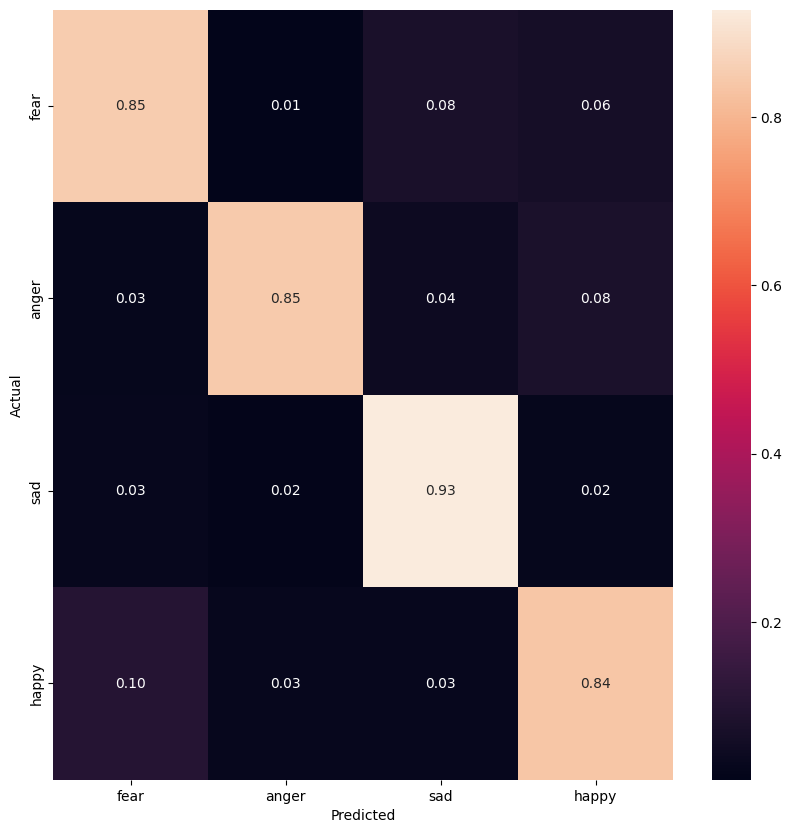

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_1)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [21]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_1)

# Define class labels
class_labels = ['fear', 'anger', 'sad', 'happy']

# Print confusion matrix with labels
print("Confusion Matrix:")
print("\t" + "\t".join(class_labels))
for i, label in enumerate(class_labels):
    print(f"{label}\t{cm[i]}")

Confusion Matrix:
	fear	anger	sad	happy
fear	[135   2  12  10]
anger	[ 3 95  5  9]
sad	[  5   3 153   4]
happy	[ 17   5   5 139]


In [23]:
# Initialize individual classifiers
ensemble_classifier_2 = VotingClassifier(estimators=[
    ('sgd', clf3),
    ('logistic', clf2),
    ('knn', clf5)
], voting='hard')

# Fit the ensemble classifier to the training data
ensemble_classifier_2.fit(X_train, y_train)

# Make predictions on the test data
y_pred_2 = ensemble_classifier_2.predict(X_test)

# Evaluate the ensemble model
accuracy_2 = accuracy_score(y_test, y_pred_2)
report_2 = classification_report(y_test, y_pred_2)

print(f"Accuracy: {accuracy_2:.2f}")
print("Classification Report:\n", report_2)

Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

       Anger       0.84      0.83      0.83       159
        Fear       0.91      0.79      0.84       112
         Joy       0.84      0.91      0.87       165
         Sad       0.80      0.81      0.80       166

    accuracy                           0.84       602
   macro avg       0.84      0.83      0.84       602
weighted avg       0.84      0.84      0.84       602



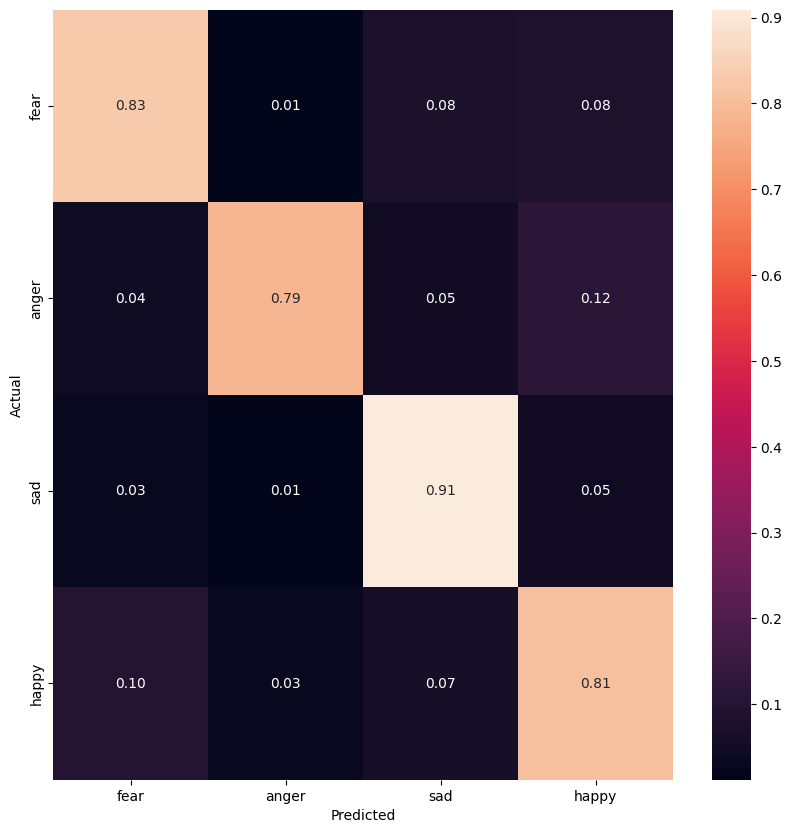

In [24]:
cm = confusion_matrix(y_test, y_pred_2)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [25]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_2)

# Define class labels
class_labels = ['fear', 'anger', 'sad', 'happy']

# Print confusion matrix with labels
print("Confusion Matrix:")
print("\t" + "\t".join(class_labels))
for i, label in enumerate(class_labels):
    print(f"{label}\t{cm[i]}")

Confusion Matrix:
	fear	anger	sad	happy
fear	[132   2  12  13]
anger	[ 5 88  6 13]
sad	[  5   2 150   8]
happy	[ 16   5  11 134]


In [26]:
# Initialize individual classifiers
ensemble_classifier_3 = VotingClassifier(estimators=[
    ('multinomial_nb', clf6),
    ('svc', clf4),
    ('linear_svc', clf1)
], voting='hard')

# Fit the ensemble classifier to the training data
ensemble_classifier_3.fit(X_train, y_train)

# Make predictions on the test data
y_pred_3 = ensemble_classifier_3.predict(X_test)

# Evaluate the ensemble model
accuracy_3 = accuracy_score(y_test, y_pred_3)
report_3 = classification_report(y_test, y_pred_3)

print(f"Accuracy: {accuracy_3:.2f}")
print("Classification Report:\n", report_3)

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

       Anger       0.84      0.85      0.85       159
        Fear       0.93      0.80      0.86       112
         Joy       0.87      0.93      0.90       165
         Sad       0.84      0.86      0.85       166

    accuracy                           0.87       602
   macro avg       0.87      0.86      0.86       602
weighted avg       0.87      0.87      0.87       602



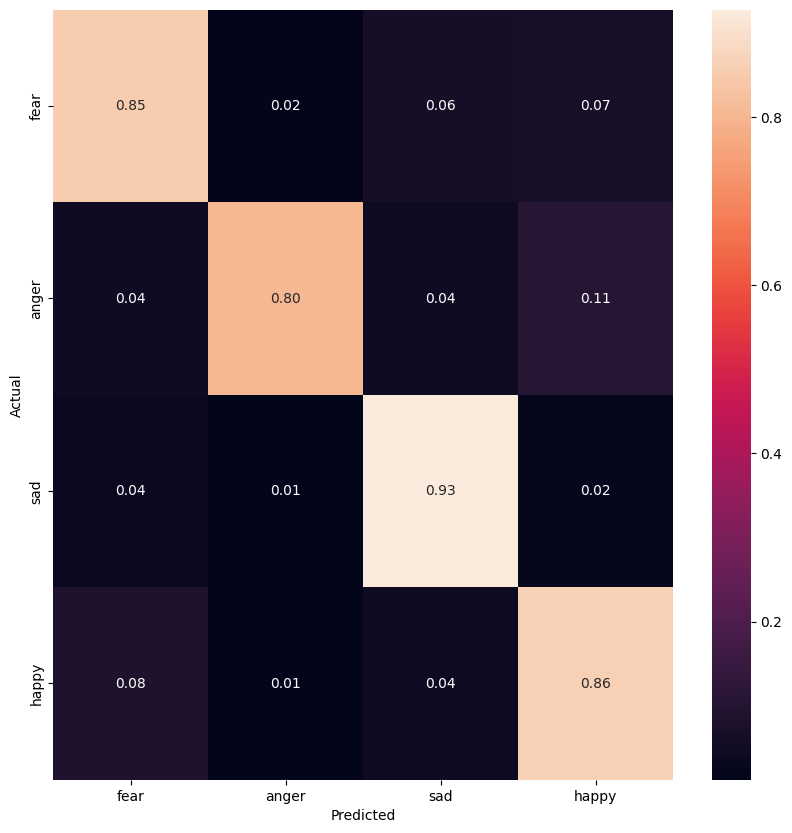

In [27]:
cm = confusion_matrix(y_test, y_pred_3)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [28]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_3)

# Define class labels
class_labels = ['fear', 'anger', 'sad', 'happy']

# Print confusion matrix with labels
print("Confusion Matrix:")
print("\t" + "\t".join(class_labels))
for i, label in enumerate(class_labels):
    print(f"{label}\t{cm[i]}")

Confusion Matrix:
	fear	anger	sad	happy
fear	[135   3  10  11]
anger	[ 5 90  5 12]
sad	[  6   2 153   4]
happy	[ 14   2   7 143]


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize individual classifiers
ensemble_classifier_4 = VotingClassifier(estimators=[
    ('svc', clf0),
    ('random_forest', clf7),
    ('svm', clf1),
    ('gradient_boosting', GradientBoostingClassifier())
], voting='hard')

# Fit the ensemble classifier to the training data
ensemble_classifier_4.fit(X_train, y_train)

# Make predictions on the test data
y_pred_4 = ensemble_classifier_4.predict(X_test)

# Evaluate the ensemble model
accuracy_4 = accuracy_score(y_test, y_pred_4)
report_4 = classification_report(y_test, y_pred_4)

print(f"Accuracy: {accuracy_4:.2f}")
print("Classification Report:\n", report_4)

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

       Anger       0.84      0.85      0.85       159
        Fear       0.92      0.88      0.90       112
         Joy       0.83      0.94      0.88       165
         Sad       0.89      0.80      0.84       166

    accuracy                           0.86       602
   macro avg       0.87      0.86      0.87       602
weighted avg       0.87      0.86      0.86       602



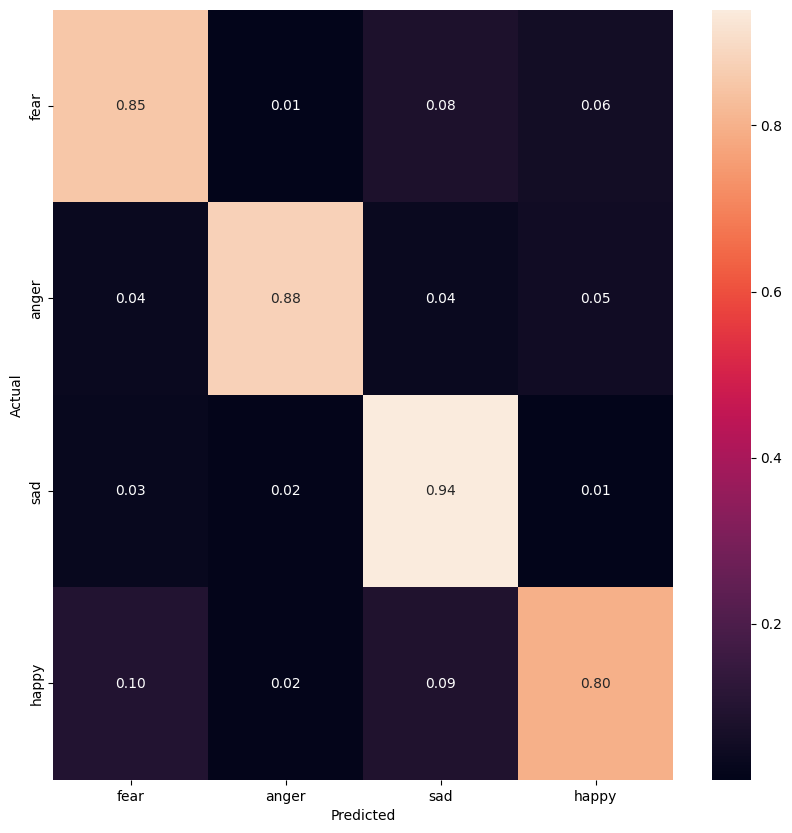

In [30]:
cm = confusion_matrix(y_test, y_pred_4)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [31]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_4)

# Define class labels
class_labels = ['fear', 'anger', 'sad', 'happy']

# Print confusion matrix with labels
print("Confusion Matrix:")
print("\t" + "\t".join(class_labels))
for i, label in enumerate(class_labels):
    print(f"{label}\t{cm[i]}")


Confusion Matrix:
	fear	anger	sad	happy
fear	[135   2  13   9]
anger	[ 4 98  4  6]
sad	[  5   3 155   2]
happy	[ 16   3  15 132]


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier
# Initialize individual classifiers
ensemble_classifier_5 = VotingClassifier(estimators=[
    ('svc', clf0),
    ('random_forest', clf7),
    ('svm', clf1),
    ('decision_tree', DecisionTreeClassifier()),
    ('extra_trees', ExtraTreesClassifier())
], voting='hard')

# Fit the ensemble classifier to the training data
ensemble_classifier_5.fit(X_train, y_train)

# Make predictions on the test data
y_pred_5 = ensemble_classifier_5.predict(X_test)

# Evaluate the ensemble model
accuracy_5 = accuracy_score(y_test, y_pred_5)
report_5 = classification_report(y_test, y_pred_5)

print(f"Accuracy: {accuracy_5:.2f}")
print("Classification Report:\n",report_5)

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

       Anger       0.87      0.84      0.85       159
        Fear       0.92      0.87      0.89       112
         Joy       0.85      0.93      0.89       165
         Sad       0.86      0.84      0.85       166

    accuracy                           0.87       602
   macro avg       0.88      0.87      0.87       602
weighted avg       0.87      0.87      0.87       602



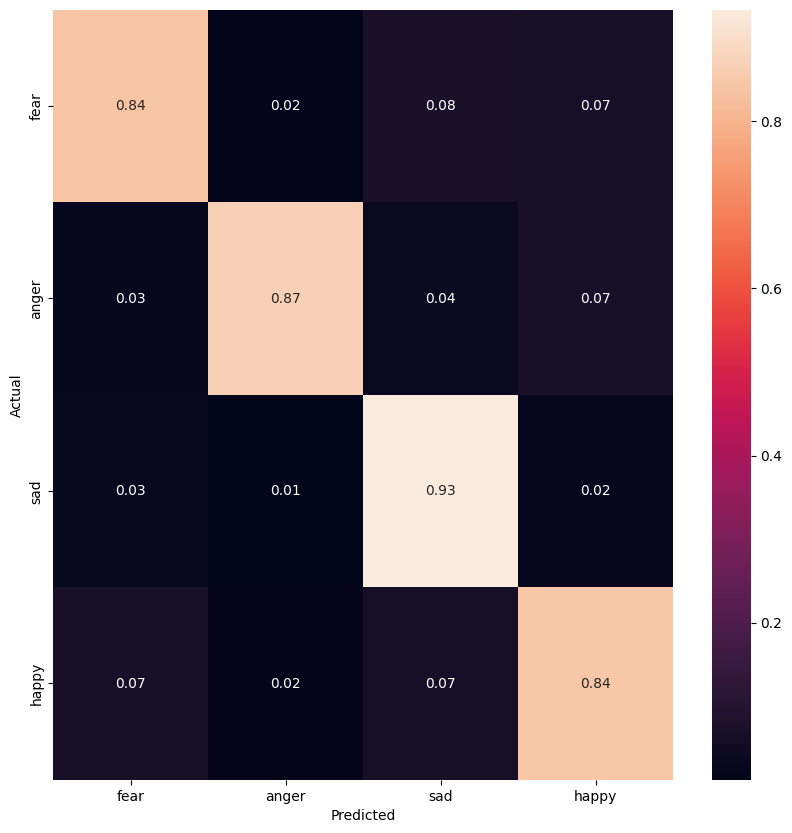

In [34]:
cm = confusion_matrix(y_test, y_pred_5)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [35]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_5)

# Define class labels
class_labels = ['fear', 'anger', 'sad', 'happy']

# Print confusion matrix with labels
print("Confusion Matrix:")
print("\t" + "\t".join(class_labels))
for i, label in enumerate(class_labels):
    print(f"{label}\t{cm[i]}")

Confusion Matrix:
	fear	anger	sad	happy
fear	[133   3  12  11]
anger	[ 3 97  4  8]
sad	[  5   2 154   4]
happy	[ 12   3  11 140]


In [36]:
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Initialize individual classifiers
ensemble_classifier_6 = VotingClassifier(estimators=[
    ('adaboost', AdaBoostClassifier(n_estimators=50)),
    ('xgboost', xgb.XGBClassifier())
], voting='hard')

# Fit the ensemble classifier to the training data
ensemble_classifier_6.fit(X_train, y_train)

# Make predictions on the test data
y_pred_6 = ensemble_classifier_6.predict(X_test)

# Evaluate the ensemble model
accuracy_6 = accuracy_score(y_test, y_pred_6)
report_6 = classification_report(y_test, y_pred_6)

print(f"Accuracy: {accuracy_6:.2f}")
print("Classification Report:\n", report_6)

Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

       Anger       0.76      0.80      0.78       159
        Fear       0.87      0.80      0.83       112
         Joy       0.79      0.84      0.82       165
         Sad       0.80      0.74      0.77       166

    accuracy                           0.80       602
   macro avg       0.80      0.80      0.80       602
weighted avg       0.80      0.80      0.80       602



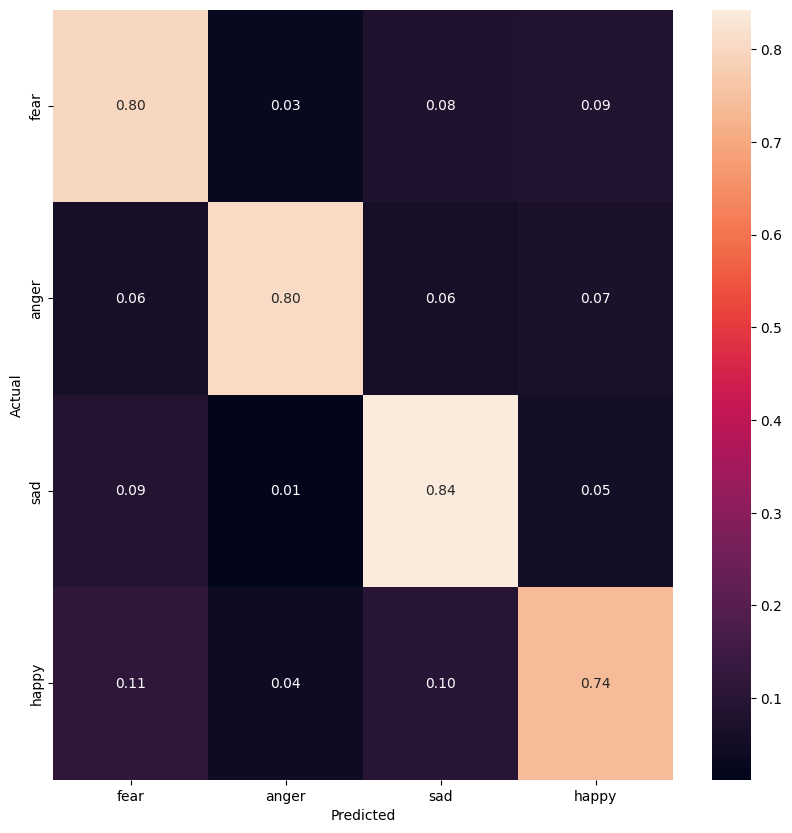

In [37]:
cm = confusion_matrix(y_test, y_pred_6)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [38]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_6)

# Define class labels
class_labels = ['fear', 'anger', 'sad', 'happy']

# Print confusion matrix with labels
print("Confusion Matrix:")
print("\t" + "\t".join(class_labels))
for i, label in enumerate(class_labels):
    print(f"{label}\t{cm[i]}")

Confusion Matrix:
	fear	anger	sad	happy
fear	[127   5  13  14]
anger	[ 7 90  7  8]
sad	[ 15   2 139   9]
happy	[ 19   7  17 123]


In [39]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Initialize individual classifiers
ensemble_classifier_7 = VotingClassifier(estimators=[
    ('random_forest', RandomForestClassifier()),
    ('kneighbors', KNeighborsClassifier(n_neighbors=175)),
    ('multinomial_nb', MultinomialNB()),
    ('adaboost', AdaBoostClassifier()),
    ('xgboost', XGBClassifier())
], voting='hard')

# Fit the ensemble classifier to the training data
ensemble_classifier_7.fit(X_train, y_train)

# Make predictions on the test data
y_pred_7 = ensemble_classifier_7.predict(X_test)

# Evaluate the ensemble model
accuracy_7 = accuracy_score(y_test, y_pred_7)
report_7 = classification_report(y_test, y_pred_7)

print(f"Accuracy: {accuracy_7:.2f}")
print("Classification Report:\n",report_7)

Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

       Anger       0.87      0.80      0.83       159
        Fear       0.96      0.77      0.85       112
         Joy       0.80      0.93      0.86       165
         Sad       0.80      0.84      0.82       166

    accuracy                           0.84       602
   macro avg       0.86      0.83      0.84       602
weighted avg       0.85      0.84      0.84       602



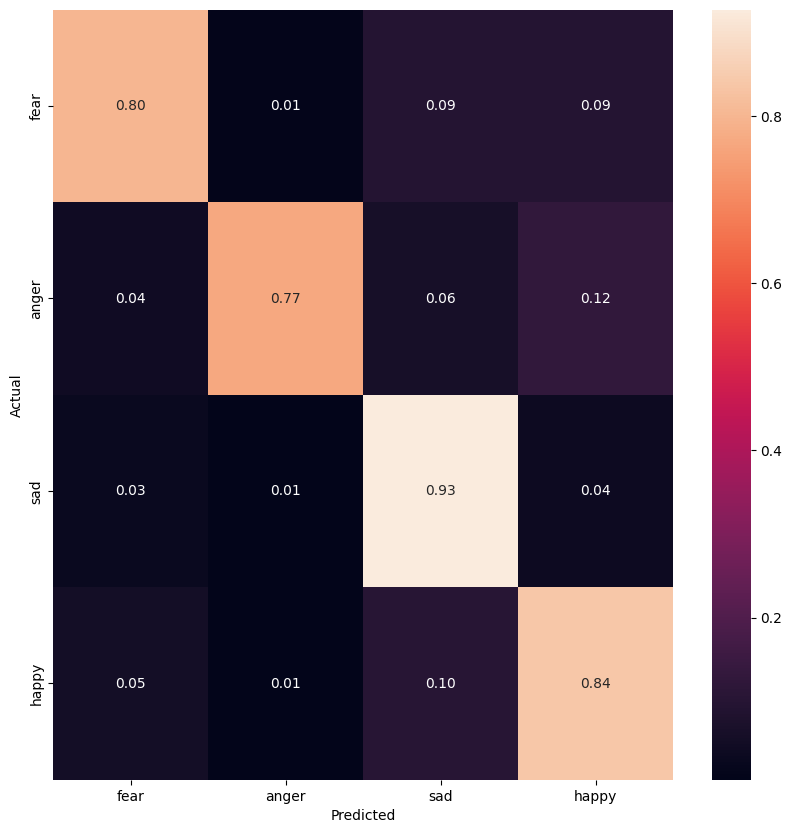

In [40]:
cm = confusion_matrix(y_test, y_pred_7)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [41]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_7)

# Define class labels
class_labels = ['fear', 'anger', 'sad', 'happy']

# Print confusion matrix with labels
print("Confusion Matrix:")
print("\t" + "\t".join(class_labels))
for i, label in enumerate(class_labels):
    print(f"{label}\t{cm[i]}")

Confusion Matrix:
	fear	anger	sad	happy
fear	[127   2  15  15]
anger	[ 5 86  7 14]
sad	[  5   1 153   6]
happy	[  9   1  17 139]


In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize individual classifiers
ensemble_classifier_8 = VotingClassifier(estimators=[
    ('ovs', clf0),
    ('svm', clf1),
    ('svc', clf4),
    ('random_forest', clf7),
    ('lr',clf2)
], voting='hard')

# Fit the ensemble classifier to the training data
ensemble_classifier_8.fit(X_train, y_train)

# Make predictions on the test data
y_pred_8 = ensemble_classifier_8.predict(X_test)

# Evaluate the ensemble model
accuracy_8 = accuracy_score(y_test, y_pred_8)
report_8 = classification_report(y_test, y_pred_8)

print(f"Accuracy: {accuracy_8:.2f}")
print("Classification Report:\n", report_8)

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

       Anger       0.86      0.84      0.85       159
        Fear       0.93      0.83      0.88       112
         Joy       0.85      0.92      0.89       165
         Sad       0.85      0.86      0.85       166

    accuracy                           0.87       602
   macro avg       0.87      0.86      0.87       602
weighted avg       0.87      0.87      0.87       602



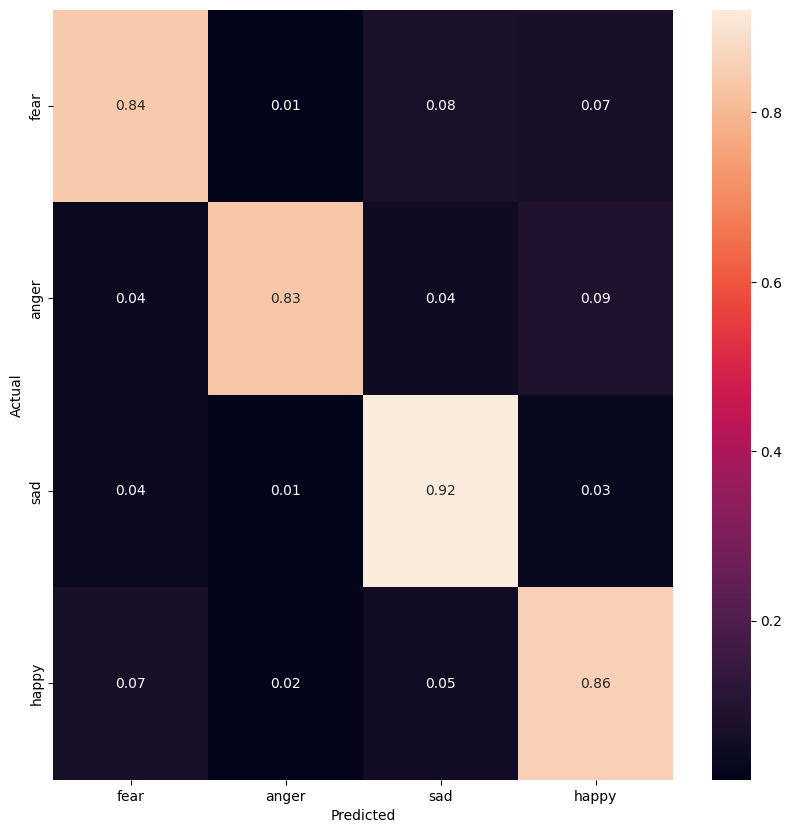

In [43]:
cm = confusion_matrix(y_test, y_pred_8)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [44]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_8)

# Define class labels
class_labels = ['fear', 'anger', 'sad', 'happy']

# Print confusion matrix with labels
print("Confusion Matrix:")
print("\t" + "\t".join(class_labels))
for i, label in enumerate(class_labels):
    print(f"{label}\t{cm[i]}")

Confusion Matrix:
	fear	anger	sad	happy
fear	[134   2  12  11]
anger	[ 4 93  5 10]
sad	[  6   2 152   5]
happy	[ 12   3   9 142]


In [45]:
#Custom User Input
def custon_inp(x):
    print(x)
    print("Enter a Kannada sentence")
    x = input()
    x = clean(x)
    print("After Cleaning and Stopwords Removal")
    print(x,'\n')
    print("After Stemming")
    x = stemming(x)
    print(x)
    vec = tfidf.transform([x])
    vec.shape
#Testing User Input On All Classifiers
    result0=clf0.predict(vec)
    result1=clf1.predict(vec)
    result2=clf2.predict(vec)
    result3=clf3.predict(vec)
    result4=clf4.predict(vec)
    result5=clf5.predict(vec)
    result6=clf6.predict(vec)
    result7=clf7.predict(vec)

    res=[result0[0],result1[0],result2[0],result3[0],result5[0],result6[0],result7[0]]
    print()
    print("Output of each Algorithms")
    print(res)
    dic = {"Joy":0,"Sad":0,"Anger":0,"Fear":0}
#Result
    for i in res:
        if i==0:
            dic["Joy"]+=1
        if i== 1:
            dic["Sad"]+=1

        if i=="Joy":
            dic["Joy"]+=1
        if i=="Sad":
            dic["Sad"]+=1
        if i=="Anger":
            dic["Anger"]+=1
        if i=="Fear":
            dic["Fear"]+=1

    print(dic)
    for key, val in dic.items():
        if val == max(dic.values()):
            Final_op=key
            print("The Sentence is classified as",Final_op)
    return Final_op
custon_inp(x)

[]
Enter a Kannada sentence
ಅವನು ಅಳುತ್ತಿದ್ದಾನೆ
After Cleaning and Stopwords Removal
ಅವನು ಅಳುತ್ತಿದ್ದಾನೆ 

After Stemming
ಅವನು ಅಳು

Output of each Algorithms
['Sad', 'Sad', 'Sad', 'Sad', 'Anger', 'Anger', 'Sad']
{'Joy': 0, 'Sad': 5, 'Anger': 2, 'Fear': 0}
The Sentence is classified as Sad


'Sad'

In [46]:
#Custom User Input
def custon_inp(x):
    print(x)
    print("Enter a Kannada sentence")
    x = input()
    x = clean(x)
    print("After Cleaning and Stopwords Removal")
    print(x,'\n')
    print("After Stemming")
    x = stemming(x)
    print(x)
    vec = tfidf.transform([x])
    vec.shape
#Testing User Input On All Classifiers
    result0=ensemble_classifier_1.predict(vec)
    result1=ensemble_classifier_2.predict(vec)
    result2=ensemble_classifier_3.predict(vec)
    result3=ensemble_classifier_4.predict(vec)
    result4=ensemble_classifier_5.predict(vec)
    result5=ensemble_classifier_6.predict(vec)
    result6=ensemble_classifier_7.predict(vec)
    result7=ensemble_classifier_8.predict(vec)

    res=[result0[0],result1[0],result2[0],result3[0],result5[0],result6[0],result7[0]]
    print()
    print("Output of each Algorithms")
    print(res)
    dic = {"Joy":0,"Sad":0,"Anger":0,"Fear":0}
#Result
    for i in res:
        if i==0:
            dic["Joy"]+=1
        if i== 1:
            dic["Sad"]+=1

        if i=="Joy":
            dic["Joy"]+=1
        if i=="Sad":
            dic["Sad"]+=1
        if i=="Anger":
            dic["Anger"]+=1
        if i=="Fear":
            dic["Fear"]+=1

    print(dic)
    for key, val in dic.items():
        if val == max(dic.values()):
            Final_op=key
            print("The Sentence is classified as",Final_op)
    return Final_op
custon_inp(x)

[]
Enter a Kannada sentence
ಅವನು ಅಳುತ್ತಿದ್ದಾನೆ
After Cleaning and Stopwords Removal
ಅವನು ಅಳುತ್ತಿದ್ದಾನೆ 

After Stemming
ಅವನು ಅಳು

Output of each Algorithms
['Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad']
{'Joy': 0, 'Sad': 7, 'Anger': 0, 'Fear': 0}
The Sentence is classified as Sad


'Sad'